# Graph 5: Looping Graph
- Looping logic
- conditional edges

In [8]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph, START, END
import random

In [9]:
class AgentState(TypedDict):
    name:str
    number: List[int]
    counter: int

In [14]:
def greet_node(state: AgentState) -> AgentState:
    """Greeting node which says hi"""
    state['name'] = f"Hi there, {state['name']}"
    state['counter'] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    """Generate random number from 0 to 10"""
    state['number'].append(random.randint(0,10))
    state['counter'] += 1

    return state

# Path/routing_func(should_loop): decides the path to take by returning a path-map("loop"|"exit")
def should_loop(state: AgentState) -> AgentState:
    """function to decide what to do next"""

    if state['counter'] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop" # Looping continues
    else:
        return "exit" # Quit looping

In [15]:
graph = StateGraph(AgentState)
graph.add_node("greet", greet_node)
graph.add_node("random", random_node)
graph.add_edge("greet", "random")

graph.set_entry_point("greet")
graph.add_conditional_edges("random", should_loop, {"loop":"random", "exit": END})

app = graph.compile()

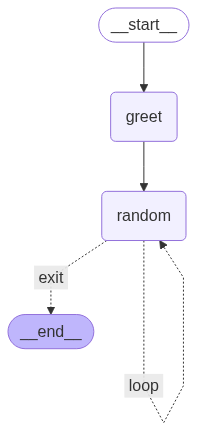

In [16]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
res = app.invoke({"name": "Henry", "number":[]})
print(res)

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4
{'name': 'Hi there, Henry', 'number': [7, 9, 10, 2, 7], 'counter': 5}


# Exercise 5

In [75]:
class State(TypedDict):
    name:str
    guesses: List[int]
    attemps: int
    lower_bound: int
    upper_bound: int
    guess_count: int
    num_to_guess: int
    hint: str


In [121]:
def setup(state: State) -> State:
    """sets up the game""" 
    state['num_to_guess'] = 10
    state['lower_bound'] = 1
    state['upper_bound'] = 12
    state['guess_count'] = 0

    return state

def guess (state: State) -> State:
    """guessing begins""" 
    if state['hint'] == "":
        guess = random.randint(state['lower_bound'], state['upper_bound'])
    if state["hint"] == "higher":
        guess = random.randint(state["guesses"][-1], state['upper_bound'])
    if state["hint"] == "lower":
        guess = random.randint(state['lower_bound'][-1], state["guesses"][-1])

    state['guesses'].append(guess)
    return state

def wanna_loop (state: State) -> State:
    """conditional edge func"""
    state['guess_count'] = len(state['guesses'])
    print(f"current guesses: {state['guesses']}. guess_count:{len(state['guesses'])}")
    print(f"Number to guess: {state['num_to_guess']}.")
  

    if  state['guess_count'] < 7 and state["guesses"][-1] != state["num_to_guess"]:
        if state['guess_count'] == 6 and state["guesses"][-1] != state["num_to_guess"]:
            print(f"Sorry you lost !!")
            return "exit"
        elif state["guesses"][-1] < state['num_to_guess']:
           state['hint'] = "higher"
           print("Next iteration Hint: higher....")
        elif state["guesses"][-1] > state['num_to_guess']:
            state['hint'] = "lower"
            print("Next iteration Hint: lower....")
        
           
        state['guess_count'] += 1
        return "loop"
    elif state['guess_count'] < 7 and state["guesses"][-1] == state["num_to_guess"]:
        print(f"Hurray! you won!... Your guess:{state['guesses'][-1]} ")
        return "exit"
   
    else :
        return "exit"

In [122]:
graph2 = StateGraph(State)

graph2.add_node("setup", setup)
graph2.add_node("guess", guess)
graph2.add_edge("setup", "guess")

graph2.add_edge(START, "setup")
graph2.add_conditional_edges("guess", wanna_loop, {"loop":"guess", "exit": END} )

app = graph2.compile()

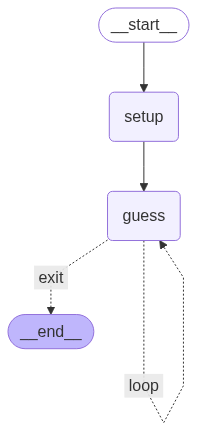

In [98]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [141]:
res = app.invoke({"name": "Student", "guesses": [], "hint": ""})

current guesses: [2]. guess_count:1
Number to guess: 10.
Next iteration Hint: higher....
current guesses: [2, 5]. guess_count:2
Number to guess: 10.
Next iteration Hint: higher....
current guesses: [2, 5, 5]. guess_count:3
Number to guess: 10.
Next iteration Hint: higher....
current guesses: [2, 5, 5, 2]. guess_count:4
Number to guess: 10.
Next iteration Hint: higher....
current guesses: [2, 5, 5, 2, 3]. guess_count:5
Number to guess: 10.
Next iteration Hint: higher....
current guesses: [2, 5, 5, 2, 3, 8]. guess_count:6
Number to guess: 10.
Sorry you lost !!
